# Section 1: Exploratory Data Analysis (EDA)

## Step 1: Load & Preview Data

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [3]:
import pandas as pd

# Set column names from dataset docs
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

# Load data, mark " ?" as NA, trim spaces
df = pd.read_csv("adult.data", header=None, names=column_names, na_values=" ?", skipinitialspace=True)

In [4]:
# Check rows & columns
print("Shape of the dataset:", df.shape)

# first 5 rows
df.head()

Shape of the dataset: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Stats for numeric cols
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# object-type (categorical) 
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head())



Column: workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Name: count, dtype: int64

Column: education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
Name: count, dtype: int64

Column: marital_status
marital_status
Married-civ-spouse    14976
Never-married         10683
Divorced               4443
Separated              1025
Widowed                 993
Name: count, dtype: int64

Column: occupation
occupation
Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Adm-clerical       3770
Sales              3650
Name: count, dtype: int64

Column: relationship
relationship
Husband          13193
Not-in-family     8305
Own-child         5068
Unmarried         3446
Wife              1568
Name: count, dtype: int64

Column: race
race
White                 27816
Black                  3124
Asian-Pac-Islande

In [7]:
# Unique counts per column
df.nunique().sort_values(ascending=False)

fnlwgt            21648
capital_gain        119
hours_per_week       94
capital_loss         92
age                  73
native_country       42
education            16
education_num        16
occupation           15
workclass             9
marital_status        7
relationship          6
race                  5
sex                   2
income                2
dtype: int64

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

## Step 2: Check for Missing Values

In [9]:
# Missing values per column
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# Look for any lingering ' ?' rows
for col in df.columns:
    count = (df[col] == ' ?').sum()
    if count > 0:
        print(f"{col} — ' ?' count: {count}")
    else:
        print(f"{col} — clean (no ' ?' values)")


age — clean (no ' ?' values)
workclass — clean (no ' ?' values)
fnlwgt — clean (no ' ?' values)
education — clean (no ' ?' values)
education_num — clean (no ' ?' values)
marital_status — clean (no ' ?' values)
occupation — clean (no ' ?' values)
relationship — clean (no ' ?' values)
race — clean (no ' ?' values)
sex — clean (no ' ?' values)
capital_gain — clean (no ' ?' values)
capital_loss — clean (no ' ?' values)
hours_per_week — clean (no ' ?' values)
native_country — clean (no ' ?' values)
income — clean (no ' ?' values)


##### Fixing Missing Values in Workclass

While creating the `workclass` vs `income` plot, I noticed a bar labeled `"?"`, which indicates that some missing values were not properly converted to `NaN` during initial data loading. 

This section fixes that issue by manually replacing any remaining `"?"` strings with `NaN`.


In [11]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [12]:
import numpy as np

# Replace leftover '?' with NaN
df.replace('?', np.nan, inplace=True)

df.isnull().sum()

df['workclass'].value_counts()


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

### Data Cleaning Notes

- Replaced `" ?"` values with `NaN` during data loading
- Manually cleaned any remaining `"?"` with `df.replace('?', np.nan)`
- Verified that all missing values were removed or handled


## Step 3: Check Class Balance

We checked the distribution of our target variable `income` to understand whether the classes are balanced.

```python
df['income'].value_counts()

In [13]:
# Class counts in target
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [14]:
df['income'].value_counts(normalize=True) * 100

income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64

# Section 2: Visualize Data with Seaborn

## Step 4a: Plot Distribution of age by Income Group

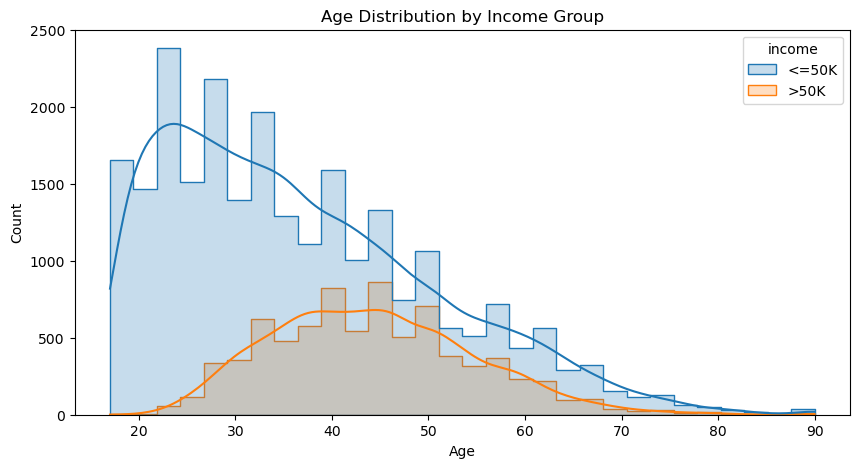

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='income', bins=30, kde=True, element='step')
plt.title('Age Distribution by Income Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


The distribution suggests that individuals earning >50K are generally older, with most falling between 40 and 60 years old. In contrast, those earning <=50K are more evenly distributed across younger age groups. This points to age being a notable factor in income levels.


## Step 4b: Visualize education Levels by Income Group

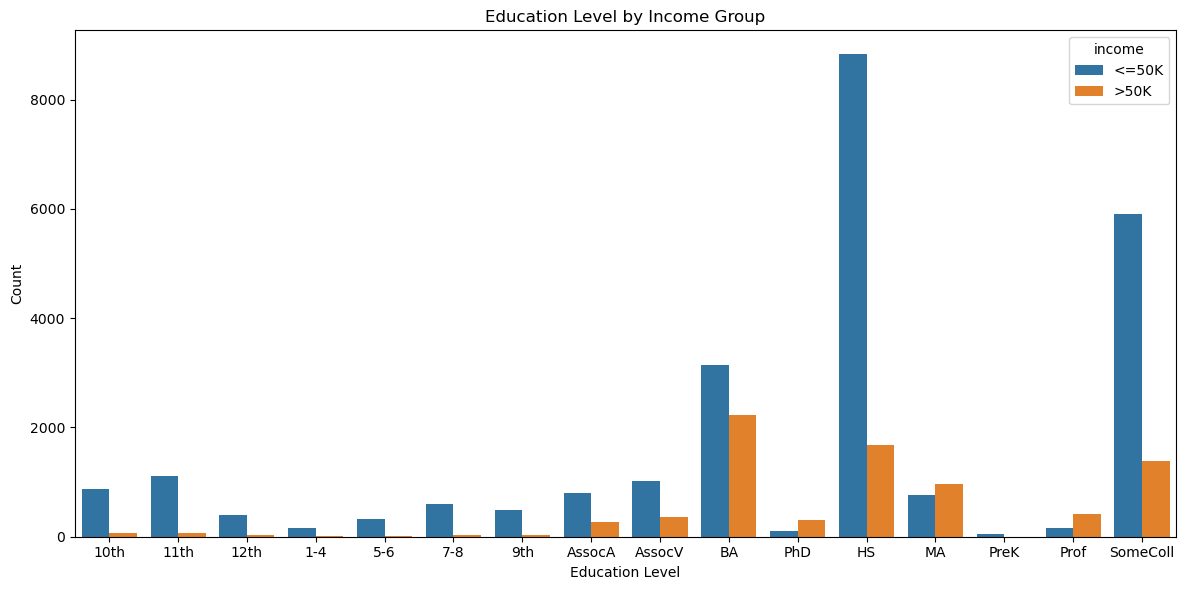

In [29]:
short_labels = {
    '10th': '10th', '11th': '11th', '12th': '12th',
    '1st-4th': '1-4', '5th-6th': '5-6', '7th-8th': '7-8',
    '9th': '9th', 'Assoc-acdm': 'AssocA', 'Assoc-voc': 'AssocV',
    'Bachelors': 'BA', 'Doctorate': 'PhD', 'HS-grad': 'HS',
    'Masters': 'MA', 'Preschool': 'PreK', 'Prof-school': 'Prof',
    'Some-college': 'SomeColl'
}

edu_order = sorted(df['education'].unique())

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='education', hue='income', order=edu_order)

ax.set_xticklabels([short_labels[label] for label in edu_order])

plt.title('Education Level by Income Group')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


This plot shows a clear link between education and income. Most people earning <=50K have a high school diploma or some college without a degree, while those making >50K tend to hold a Bachelors, Masters, or Doctorate. The income gap is especially noticeable at the advanced degree level, suggesting a strong correlation between higher education and higher income in this dataset.

## Step 4c: Visualize workclass by Income Group

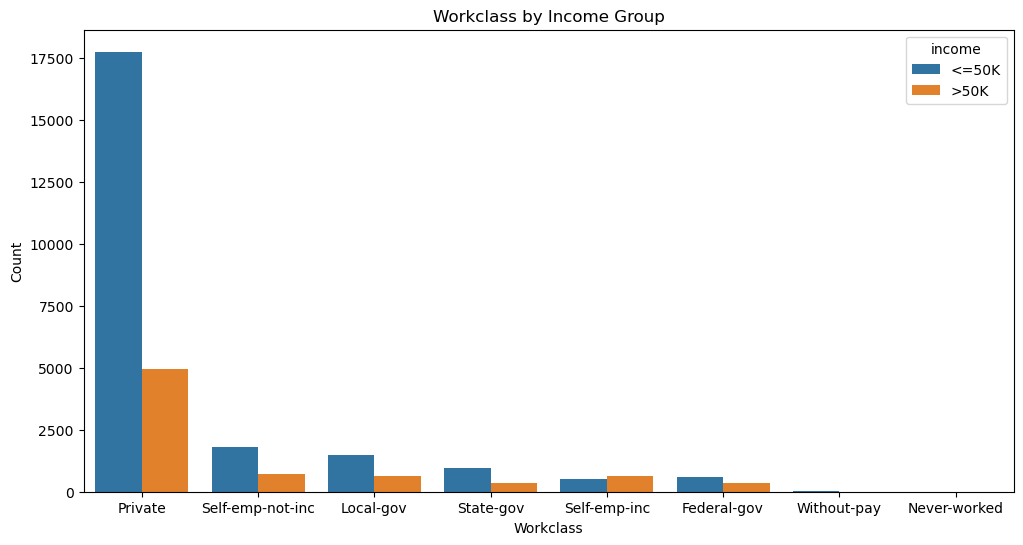

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='workclass', hue='income', order=df['workclass'].value_counts().index)
plt.title('Workclass by Income Group')
plt.xticks(rotation=0)
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()


This plot shows how income varies across different work classes. Most people work in the Private sector, and the majority of them earn <=50K. That said, there’s a noticeable group of >50K earners in categories like "Self-emp-inc", "Federal-gov", and "State-gov", suggesting that government and incorporated self-employed roles tend to pay more. The dataset is now cleaned up, with no remaining "?" entries.

## Step 4d: Visualize sex by Income Group

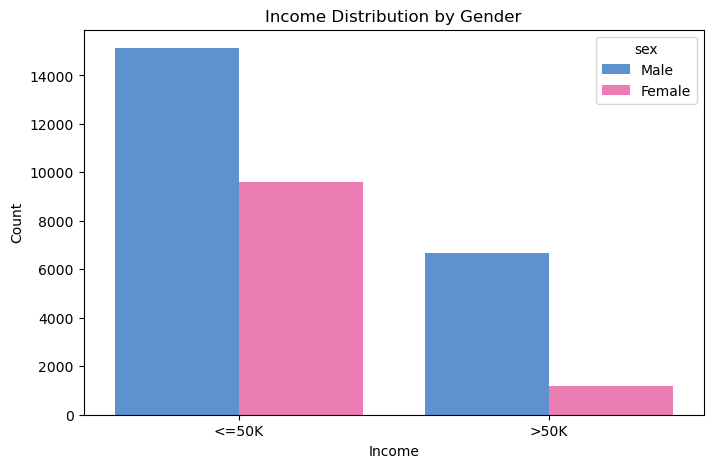

In [18]:
plt.figure(figsize=(8, 5))

# Flip: x = income, hue = sex
custom_colors = {'Male': '#4A90E2', 'Female': '#FF69B4'}

sns.countplot(data=df, x='income', hue='sex', palette=custom_colors)

plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()



This plot shows how income is distributed by gender. A larger share of males earn >50K compared to females, though most individuals in both groups fall into the <=50K category. The gap between male and female high earners is visually noticeable, pointing to a possible gender income disparity in the dataset. This could be an important factor to consider when looking at fairness or bias in any predictive models later on.

## Step 4e: Visualize occupation by Income Group

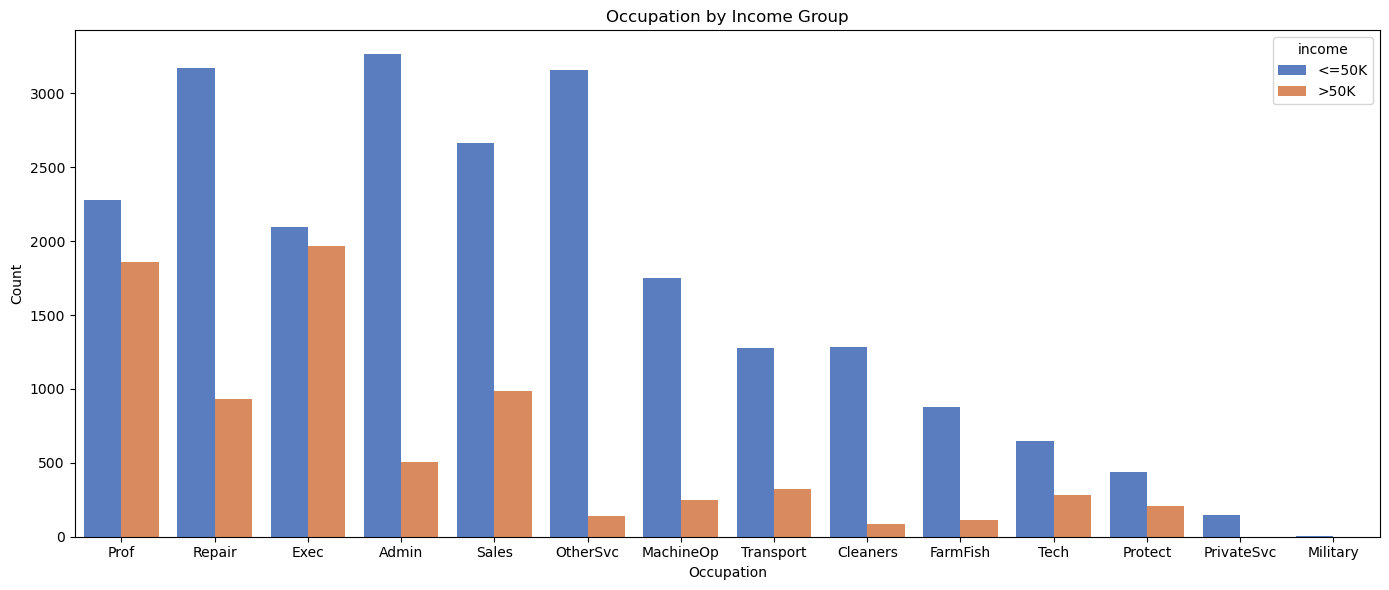

In [30]:
occupation_short = {
    'Adm-clerical': 'Admin',
    'Exec-managerial': 'Exec',
    'Machine-op-inspct': 'MachineOp',
    'Other-service': 'OtherSvc',
    'Priv-house-serv': 'PrivateSvc',
    'Prof-specialty': 'Prof',
    'Protective-serv': 'Protect',
    'Tech-support': 'Tech',
    'Transport-moving': 'Transport',
    'Farming-fishing': 'FarmFish',
    'Handlers-cleaners': 'Cleaners',
    'Craft-repair': 'Repair',
    'Armed-Forces': 'Military',
    'Sales': 'Sales'
}

occ_order = df['occupation'].value_counts().index.tolist()

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='occupation', hue='income', order=occ_order, palette='muted')

ax.set_xticklabels([occupation_short.get(label, label) for label in occ_order])

plt.title('Occupation by Income Group')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


This plot reveals how income varies across different occupations. Roles like "Exec-managerial" and "Prof-specialty" show a noticeably higher proportion of individuals earning `>50K`, compared to other occupations. On the other hand, jobs like "Handlers-cleaners", "Machine-op-inspct", and "Priv-house-serv" are almost entirely in the `<=50K` range. This indicates that occupation is a highly predictive feature when determining income level.


## Step 4f: Plot hours_per_week by Income Group

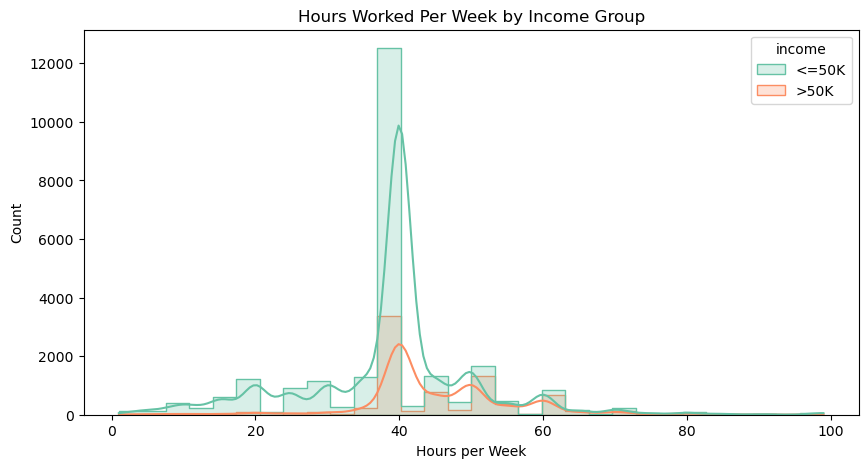

In [20]:
plt.figure(figsize=(10, 5))

sns.histplot(data=df, x='hours_per_week', hue='income', bins=30, kde=True, element='step', palette='Set2')

plt.title('Hours Worked Per Week by Income Group')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.show()


Most people in the dataset work around 40 hours per week, no matter their income. That said, those earning >50K are a bit more likely to work longer hours, with noticeable peaks between 45 and 60 hours. This suggests that while hours worked might influence income, it's not the whole story plenty of full time workers still earn <=50K.

## Step 5: Correlation Heatmap (Numerical Features)

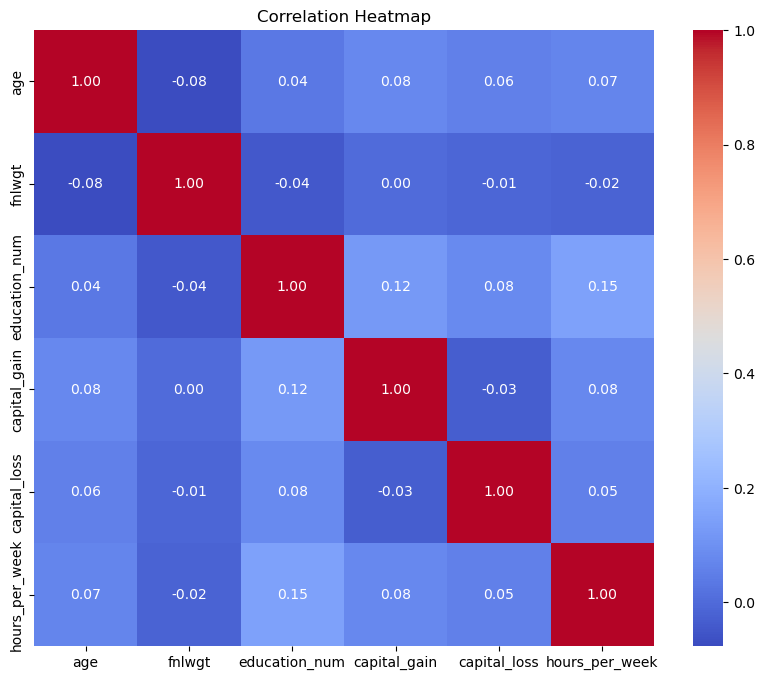

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


This heatmap shows how the numerical features relate to each other. Most of them aren’t strongly linked, which means there’s not much overlap in the information they provide. education_num has a mild connection with both capital_gain and hours_per_week, but nothing stands out as highly correlated—nothing over 0.8, for instance. So, there’s no need to drop any features for being too similar. Overall, it looks like each numerical feature adds something unique to the model.



## Step 6: Categorical Predictive Power Check (Crosstabs with Income)

In [22]:
pd.crosstab(df['education'], df['income'], normalize='index').round(2)

income,<=50K,>50K
education,,
10th,0.93,0.07
11th,0.95,0.05
12th,0.92,0.08
1st-4th,0.96,0.04
5th-6th,0.95,0.05
7th-8th,0.94,0.06
9th,0.95,0.05
Assoc-acdm,0.75,0.25
Assoc-voc,0.74,0.26


There's a clear trend of higher income with higher education levels. People with Doctorates or Professional degrees are much more likely to earn >50K, while those with only a high school education or less are mostly in the <=50K group. This makes it pretty clear that education (and education_num) will be key features in our classification model.

In [23]:
pd.crosstab(df['occupation'], df['income'], normalize='index').round(2)

income,<=50K,>50K
occupation,,
Adm-clerical,0.87,0.13
Armed-Forces,0.89,0.11
Craft-repair,0.77,0.23
Exec-managerial,0.52,0.48
Farming-fishing,0.88,0.12
Handlers-cleaners,0.94,0.06
Machine-op-inspct,0.88,0.12
Other-service,0.96,0.04
Priv-house-serv,0.99,0.01


Occupation is a strong indicator of income. Roles like Exec-managerial and Prof-specialty have a much higher share of people earning >50K, while jobs like Handlers-cleaners and Priv-house-serv are almost entirely in the <=50K group.

In [24]:
pd.crosstab(df['workclass'], df['income'], normalize='index').round(2)

income,<=50K,>50K
workclass,,
Federal-gov,0.61,0.39
Local-gov,0.71,0.29
Never-worked,1.00,0.00
Private,0.78,0.22
Self-emp-inc,0.44,0.56
Self-emp-not-inc,0.72,0.28
State-gov,0.73,0.27
Without-pay,1.00,0.00


Workclass shows some clear income patterns. People who are self-employed (incorporated) or work in the federal government are more likely to earn >50K, while those in the private sector, state/local government, or who’ve never worked mostly fall into the <=50K group.

In [25]:
pd.crosstab(df['sex'], df['income'], normalize='index').round(2)

income,<=50K,>50K
sex,,
Female,0.89,0.11
Male,0.69,0.31


Income distribution by sex shows a clear gap about 31% of males earn >50K, compared to just 11% of females. This highlights a significant difference in income levels between genders.

# Section 3: Feature Selection

## Step 1: Separate Features (X) and Target (y)


In [32]:
# Separate features and target
X = df.drop('income', axis=1)
y = df['income']


In [33]:
print("X shape:", X.shape)
print("\nX preview:")
display(X.head())

print("y distribution:")
print(y.value_counts())

X.dtypes


X shape: (32561, 14)

X preview:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


y distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

I split the data into input features (X) and the target variable (y). X has 14 columns and 32,561 rows, while y holds the binary income labels (<=50K or >50K). Most input features are categorical like workclass, education, and occupation so they’ll need to be encoded before we move on to feature selection or modeling. The target variable is also imbalanced, with around 76% of people earning <=50K and only 24% earning >50K.

## Step 2: Encode Categorical Variables


In [35]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Preview the encoded dataset
print("Shape after encoding:", X_encoded.shape)
X_encoded.head()


Shape after encoding: (32561, 97)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


After one hot encoding, the dataset grew from 14 to 97 columns. This jump comes from the many unique categories in features like education, occupation, and native_country. Now that everything is numeric, the data’s ready for feature selection and machine learning models.

## Step 3: Apply Feature Selection Methods


### Step 3a: Chi-Square Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

X_chi = X_encoded.copy()

chi2_selector = SelectKBest(score_func=chi2, k=10)  # top 10 features
chi2_selector.fit(X_chi, y)

chi2_selected_features = X_chi.columns[chi2_selector.get_support()]

print("Top 10 features selected by Chi-Square:")
print(chi2_selected_features)


Top 10 features selected by Chi-Square:
Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'marital_status_Married-civ-spouse',
       'marital_status_Never-married', 'occupation_Exec-managerial',
       'relationship_Own-child'],
      dtype='object')


I used the Chi-Square test with SelectKBest to find the 10 features most strongly linked to the target (income). Since the features and target are categorical or already encoded, Chi-Square is a good fit here. The top 10 features selected include: age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week, and key category indicators like marital_status_Married-civ-spouse, marital_status_Never-married, occupation_Exec-managerial, and relationship_Own-child.

### Step 3b: Mutual Information Feature Selection

I used `mutual_info_classif` to calculate how much each feature contributes to predicting `income`. Unlike Chi-Square, mutual information can detect nonlinear relationships and works for both continuous and categorical inputs. Below are the top 10 features by MI score.

In [37]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_encoded, y, discrete_features='auto', random_state=0)

mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi_scores})

mi_df = mi_df.sort_values(by='MI Score', ascending=False)
print("Top 10 features by Mutual Information:")
print(mi_df.head(10))


Top 10 features by Mutual Information:
                              Feature  MI Score
29  marital_status_Married-civ-spouse  0.107931
2                       education_num  0.061942
31       marital_status_Never-married  0.061335
0                                 age  0.059183
3                        capital_gain  0.048669
5                      hours_per_week  0.036233
49             relationship_Own-child  0.034763
56                           sex_Male  0.031119
36         occupation_Exec-managerial  0.020087
47         relationship_Not-in-family  0.018125


The top features identified by mutual information include marital_status_Married-civ-spouse and Never-married, both showing strong links to income. education_num and age also stand out as highly predictive. Other helpful features include capital_gain, hours_per_week, and sex_Male. Features like occupation_Exec-managerial and relationship_Own-child back up what we saw earlier in the EDA. These variables will likely be important inputs for the classification models.


## Step 4: Saving Clean Data

In [39]:
X_encoded['income'] = y

X_encoded.to_csv("adult_clean_census_data.csv", index=False)
